1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

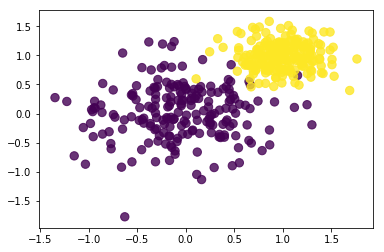

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy
import random
import pandas as pd
import seaborn as sns
from scipy import stats

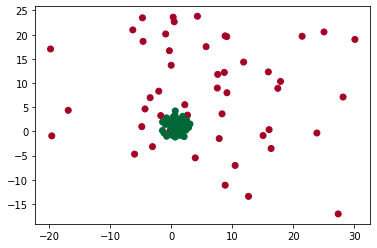

In [3]:
def generate_Data_Set (mean1,std1,mean2,std2,N) :
    set1= []
    set2= []
    for i in range(N):  
        x1 =random.gauss(mean1, std1)
        y1 =random.gauss(mean1, std1)
        set1.append([x1,y1])
        x2 =random.gauss(mean2, std2)
        y2 =random.gauss(mean2, std2)
        set2.append([x2,y2])
    return(np.array(set1).T,np.array(set2).T)

N=50
(set1,set2)= generate_Data_Set (5,10,1,1,N) 
fig, ax = plt.subplots()
ax.scatter(x=[set1[0],set2[0]], y=[set1[1],set2[1]],c=[[1 for i in range (N)],[2 for i in range (N)]],cmap='RdYlGn')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

cleaned dataframe:
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]

linear regression residuals VS distances : 
 LinregressResult(slope=0.577913366635926, intercept=10.025258299436526, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.1298980963225655, intercept_stderr=0.05919737176060825)


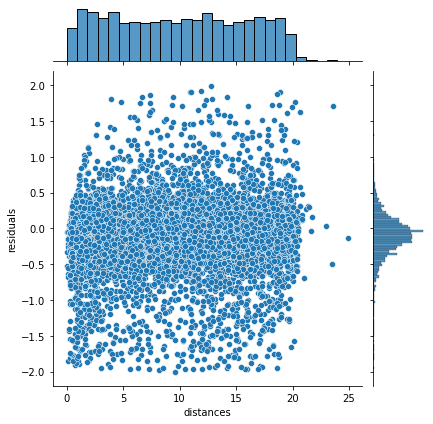

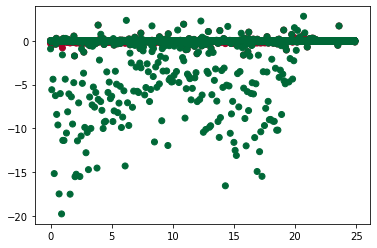

In [35]:
#Convert the content to a Pandas Dataframe
data=np.load('data/residuals_261.pkl',allow_pickle=True)
df=pd.DataFrame(data.item())

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df_cleaned = pdf[abs(pdf['residuals'])<2]
print("cleaned dataframe:\n",df_cleaned)

#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
print("\nlinear regression residuals VS distances : \n",scipy.stats.linregress(pdfclean['residuals'],pdfclean['distances']))
sns.jointplot(x="distances", y="residuals", data=df_cleaned);

#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning
#the array of bin centers of the profile histogram of the "distance" variable
x = np.linspace(df_cleaned['distances'].min(),df_cleaned['distances'].max(),len(df_cleaned['distances']))
#the mean values of the "residuals", estimated in slices (bins) of "distance"
y=[0]
for i in range(len(x)-1):
    df_instance = df_cleaned[df_cleaned['distances'].between(x[i],x[i+1])]
    if not(df_instance.empty):
        y.append(df_instance['residuals'].mean())
    else:
        y.append(0)
#the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y=[0]
for i in range(len(x)-1):
    df_instance = df_cleaned[df_cleaned['distances'].between(x[i],x[i+1])]
    if not(df_instance.empty):
        err_y.append(df_instance['residuals'].sum())
    else:
        err_y.append(0)
#Plot the profile plot on top of the scatter plot
fig, ax = plt.subplots()
ax.scatter(x=[x,x], y=[y,err_y],c=[[1 for i in range (len(x))],[2 for i in range (len(x))]],cmap='RdYlGn')

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


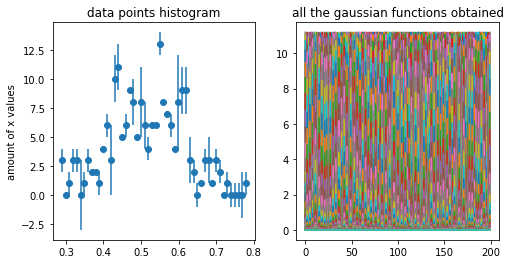

In [38]:
#Fill a numpy array x of length N (with  𝑁=(100) ) with a variable normally distributed, 
#with a given mean and standard deviation
mean=0.5
std = 0.1
N=200
x = np.random.normal(mean, std,N)

#Fill an histogram as data points with errors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.set_title('data points histogram')
ax1.set_ylabel('amount of x values')
ax2.set_title('all the gaussian functions obtained')
counts,bin_edges = np.histogram(x,50)
centres = (bin_edges[:-1] + bin_edges[1:])/2.
error=np.random.poisson(size=centres.size)
ax1.errorbar(centres, counts, yerr=error, fmt='o')


# create a gaussian with the mean corresponding the element value and the standard deviation as a parameter that can be tuned :
sd = 1.06*np.std(x)*np.size(x)**(-1/5) 
value= np.linspace(0,1,N)
gauss_x= [stats.norm(i, sd).pdf(value) for i in x] 
ax2.plot(gauss_x)
s= np.sum(gauss_x,0)  
normalize= scipy.integrate.trapz(x,s)